In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
locdata = ('/content/drive/My Drive/Python/')
dataku = (locdata + 'tiktok_review.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from nltk.stem.snowball import SnowballStemmer
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dipake = pd.read_csv(dataku)
dipake

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOHRz-11c0apHLSKHHp52FxUXsQS9Z88wP3sWc5...,MR LOL GAMER,https://play-lh.googleusercontent.com/a/AATXAJ...,Good,5,0,23.8.4,2022-04-05 23:18:30,NaN,NaN
1,gp:AOqpTOF6mFDEkIypmyT3shDLjPHg8zB3kdns2W36ahp...,Dino Kljako,https://play-lh.googleusercontent.com/a-/AOh14...,Awesome app! Too many people on it where it's ...,5,0,NaN,2022-04-05 23:18:21,NaN,NaN
2,gp:AOqpTOGtqU4sb8vuVo3-eB7kIXWoBn-0YCUZ1SnPRKS...,Olivia Harding,https://play-lh.googleusercontent.com/a/AATXAJ...,Not bad,5,0,23.9.5,2022-04-05 23:17:34,NaN,NaN
3,gp:AOqpTOFHDm-Qa5R6jCpOGTFT2qr1_PKbCTbBNPahCEn...,Keli We,https://play-lh.googleusercontent.com/a-/AOh14...,It is good,2,0,22.2.5,2022-04-05 23:17:04,NaN,NaN
4,gp:AOqpTOFB6Ndao8IHRpOJRmbSknwMGxHcwYzux93YyXI...,Mavis Kotoka,https://play-lh.googleusercontent.com/a/AATXAJ...,Very interesting app,5,0,22.1.5,2022-04-05 23:17:04,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
307052,gp:AOqpTOEX2qzcEhnamYxu8Jrnu4Ia0UtuHkajx6I1Y_j...,Nze Alpeace,https://play-lh.googleusercontent.com/a/AATXAJ...,"Best app ever let's do it ,very awesome let ev...",5,0,22.6.5,2022-01-17 10:44:38,NaN,NaN
307053,gp:AOqpTOHnBTSFCqxFYSsNrg4vztYn-Z0Gg3aCIGLliRK...,Shalina Sayed,https://play-lh.googleusercontent.com/a/AATXAJ...,I LOVE TIKTOK,5,0,22.8.4,2022-01-17 10:44:31,NaN,NaN
307054,gp:AOqpTOEuzjdo0NhbqpSBB18hhKP8X6FNPDOWVsan_TA...,ntokozo zondi,https://play-lh.googleusercontent.com/a/AATXAJ...,The videos are amazing...such an amazing app,5,0,22.8.4,2022-01-17 10:43:06,NaN,NaN
307055,gp:AOqpTOFoaOhvxddyVQPQJHpv9f4kgn2u2kkniAWQTRM...,Asika Emeka,https://play-lh.googleusercontent.com/a/AATXAJ...,Nice app,5,0,NaN,2022-01-17 10:42:27,NaN,NaN


In [ ]:
inuse = dipake[["content", "score"]]
inuse

,content,score
0,Good,5
1,Awesome app! Too many people on it where it's ...,5
2,Not bad,5
3,It is good,2
4,Very interesting app,5
...,...,...
307052,"Best app ever let's do it ,very awesome let ev...",5
307053,I LOVE TIKTOK,5
307054,The videos are amazing...such an amazing app,5
307055,Nice app,5


In [ ]:
inuse.isna().sum()

content    4
score      0
dtype: int64

In [ ]:
inuse.isna()

,content,score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
307052,False,False
307053,False,False
307054,False,False
307055,False,False


In [ ]:
stopword = set(stopwords.words('english'))
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text=" ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text
inuse["content"] = inuse["content"].apply(clean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
rating = inuse['score'].value_counts()
num = rating.index
qtt = rating.values
import plotly.express as px
fig = px.pie(inuse,
             values = qtt,
             names = num, hole = 0.5)
fig.show()

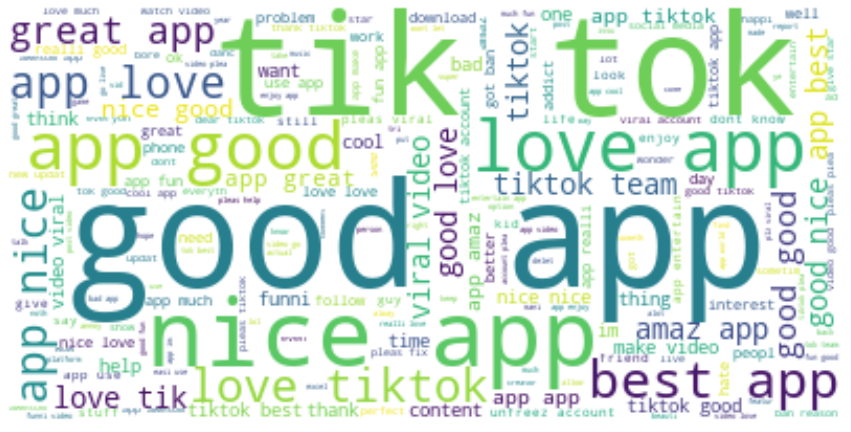

In [ ]:
text = " ".join(i for i in inuse.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
inuse["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in inuse["content"]]
inuse["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in inuse["content"]]
inuse["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in inuse["content"]]
baru = inuse[["content", "Positive", "Negative", "Neutral"]]
baru

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,content,Positive,Negative,Neutral
0,good,1.000,0.0,0.000
1,awesom app mani peopl easier fb girl awesom gu...,0.381,0.0,0.619
2,bad,0.000,1.0,0.000
3,good,1.000,0.0,0.000
4,interest app,0.750,0.0,0.250
...,...,...,...,...
307052,best app ever let awesom let everybodi everywh...,0.419,0.0,0.581
307053,love tiktok,0.808,0.0,0.192
307054,video amazingsuch amaz app,0.000,0.0,1.000
307055,nice app,0.737,0.0,0.263


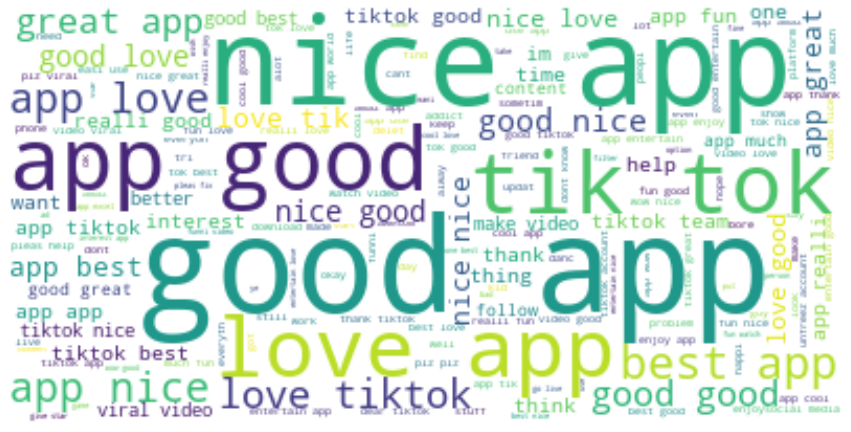

In [ ]:
post = " ".join([i for i in baru['content'][baru['Positive']>baru['Negative']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(post)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

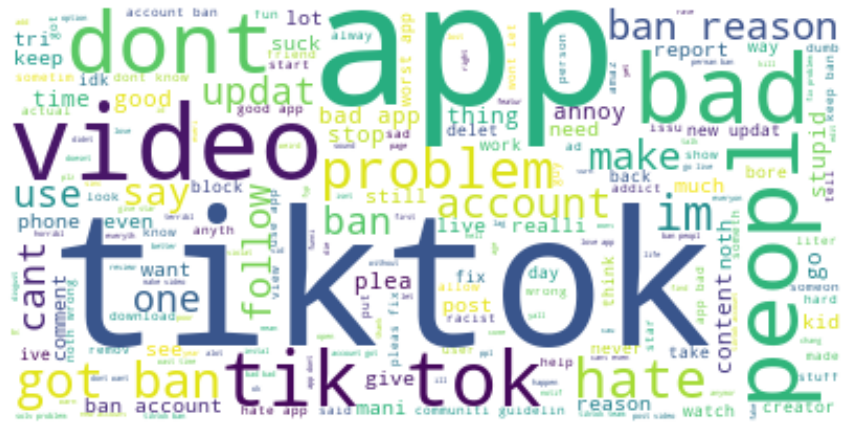

In [ ]:
neg = " ".join([i for i in baru['content'][baru['Negative']>baru['Positive']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neg)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()